# Unsupervised Learning

## Part 1 : Data distribution and the law of large
numbers

1)Propose a 2-dimensional random variable Z = (X, Y), with X and Y being two
real (∈ R), discrete or continuous random variables. These two variables should
represent a quantities of your choice (e.g. the age of the individuals in a population,
the color of the eyes of these individuals, ...). Compute the expected value of Z, that must be finite.



Let's say that we have a coin and a dice. The experiment consist of flipping the coin then the dice. 

The random variable (X) represent the number of Head obtained after 3 flip. 

The random variable (Y) represent the number of Ace after after 2 dice rolled.

Both random variable are discrete and independent from each other.

Let's create an array of both distribution in which we can clearly see all the possible outcome of those experiment.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

There is 2 exposant(3) result possible for space (X) so 8 possible result. Let's build the coin experiment space (all the possible value from the experiment).

In [2]:
coinNbOutcome = 2**3
coinSpace = np.array([ [x, y, z] for x in range(0, 2) for y in range(0, 2) for z in range(0, 2)])
coinSpaceRep = np.array(["HEAD" if number == 1 else "TAIL" for item in coinSpace for number in item]).reshape(-1, 3)


print("Shape: ", coinSpace.shape)
print("Coin Experiment Space : \n",coinSpaceRep)


Shape:  (8, 3)
Coin Experiment Space : 
 [['TAIL' 'TAIL' 'TAIL']
 ['TAIL' 'TAIL' 'HEAD']
 ['TAIL' 'HEAD' 'TAIL']
 ['TAIL' 'HEAD' 'HEAD']
 ['HEAD' 'TAIL' 'TAIL']
 ['HEAD' 'TAIL' 'HEAD']
 ['HEAD' 'HEAD' 'TAIL']
 ['HEAD' 'HEAD' 'HEAD']]


Now let's look at the odds of getting Heads after 3 flip.

In [3]:
coinProba = [(len(np.where(coinSpace[:,[0]] + coinSpace[:,[1]] + coinSpace[:,[2]] == x)[0]) / coinNbOutcome) for x in range(0, 4)]
dfCoinProba = pd.DataFrame(coinProba)
print(dfCoinProba)

       0
0  0.125
1  0.375
2  0.375
3  0.125


As we can see, there is 

1/8%(0.125) chances of getting 0 Head

3/8%(0.375) chances of getting 1 Head

3/8%(0.375) chances of getting 2 Heads 

1/8%(0.125) chances of getting 3 Heads

In [4]:
print(dfCoinProba.sum())

0    1.0
dtype: float64


Since the all the probability summed together add up to one, everything is correct.

There is 6 exposant(2) result possible for space (Y) so 36 possible result. Let's build the dice experiment space (all the possible value from the experiment).

In [5]:
diceNbOutcome = 6**2
diceSpace = np.array([ [x, y] for x in range(1, 7) for y in range(1, 7)])

print("Shape: ", diceSpace.shape)
print("Dice Experiment Space : \n",diceSpace)

Shape:  (36, 2)
Dice Experiment Space : 
 [[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [1 6]
 [2 1]
 [2 2]
 [2 3]
 [2 4]
 [2 5]
 [2 6]
 [3 1]
 [3 2]
 [3 3]
 [3 4]
 [3 5]
 [3 6]
 [4 1]
 [4 2]
 [4 3]
 [4 4]
 [4 5]
 [4 6]
 [5 1]
 [5 2]
 [5 3]
 [5 4]
 [5 5]
 [5 6]
 [6 1]
 [6 2]
 [6 3]
 [6 4]
 [6 5]
 [6 6]]


Now let's look at the odds of getting Ace after 2 dice rolled.

In [6]:
diceProba0Ace = len(np.where((diceSpace[:,1] != 1) & (diceSpace[:,0] != 1).any())[0]) /diceNbOutcome
diceProba2Ace = len(np.where((diceSpace[:,1] + diceSpace[:,0]) == 2)[0]) /diceNbOutcome
diceProba1Ace = len(np.where((diceSpace[:,1] == 1) & (diceSpace[:,0] == 1).any())[0]) /diceNbOutcome - diceProba2Ace

dfDiceProba = pd.DataFrame([diceProba0Ace, diceProba1Ace, diceProba2Ace])
print(dfDiceProba)

          0
0  0.833333
1  0.138889
2  0.027778


In [7]:
diceProba2Ace = len(np.where((diceSpace.sum(axis=1) == 2 ))[0]) /diceNbOutcome
print(diceProba0Ace)
print(25/36)
print(1/36)
print(diceSpace.sum(axis=1))

0.8333333333333334
0.6944444444444444
0.027777777777777776
[ 2  3  4  5  6  7  3  4  5  6  7  8  4  5  6  7  8  9  5  6  7  8  9 10
  6  7  8  9 10 11  7  8  9 10 11 12]


In [8]:
diceProba0Ace = ((5/6)**2)
diceProba1Ace = ((1/6 * 5/6) + (5/6 * 1/6))
diceProba2Ace = ((1/6)**2)
dfDiceProba = pd.DataFrame([diceProba0Ace, diceProba1Ace, diceProba2Ace])
print(dfDiceProba)

          0
0  0.694444
1  0.277778
2  0.027778


As we can see, there is 

25/36%(0.833) of chance of getting 0 Ace

10/36%(0.138) of chance of getting 1 Ace

1/36%(0.027) of chance of getting 2 Aces 

In [9]:
print(dfDiceProba.sum())

0    1.0
dtype: float64


Since the all the probability summed together add up to one, everything is correct.

Now let's plot X and Y.

<AxesSubplot: >

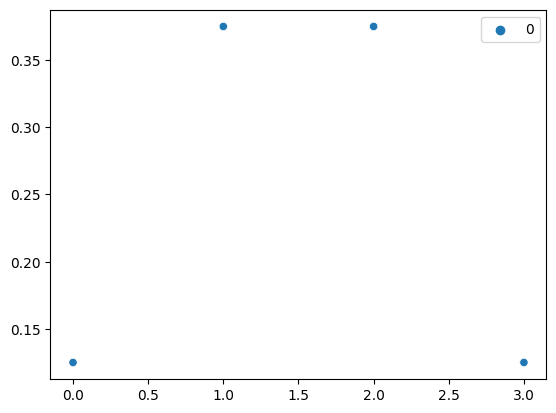

In [42]:
sns.scatterplot(data=dfCoinProba)
 # Mettre des points a la place des lignes

<AxesSubplot: >

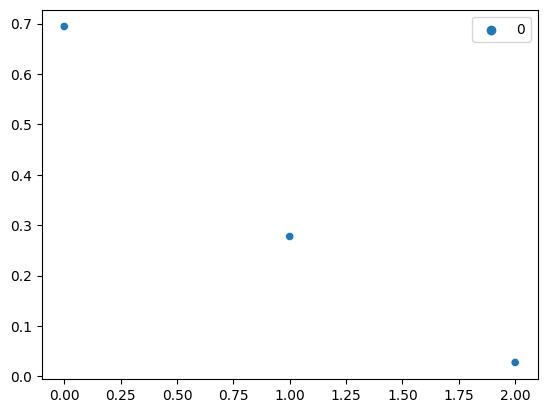

In [41]:

sns.scatterplot(data=dfDiceProba)

In [12]:
print(dfDiceProba)
print(dfDiceProba[0][2])

          0
0  0.694444
1  0.277778
2  0.027778
0.027777777777777776


In [13]:
ex = (1 * dfCoinProba[0][1]) + (2 * dfCoinProba[0][2]) + (3 * dfCoinProba[0][3])
ey = (1 * dfDiceProba[0][1]) + (2 * dfDiceProba[0][2])
ez = (ex, ey)
print("Espected Value(X) : ",ex)
print("Espected Value(Y) : ",ey)
print("Espected Value(Z) : ",ez)
print(dfDiceProba)

Espected Value(X) :  1.5
Espected Value(Y) :  0.33333333333333337
Espected Value(Z) :  (1.5, 0.33333333333333337)
          0
0  0.694444
1  0.277778
2  0.027778


So the expected value of X is 1.5 and the expected value of y is 0.194
E(X) = 1.5
E(Y) = 0.194
Since X and Y are indepedent
E(Z) = (E(X), E(Y))

In [14]:
diceP = np.array([dfDiceProba.iat[number, 0] for number in range(0, 3)])
coinP = np.array([dfCoinProba.iat[number, 0] for number in range(0, 4)])

probaXY = diceP.reshape(3, 1) @ coinP.reshape(1, 4) # A retenir

print(probaXY)


[[0.08680556 0.26041667 0.26041667 0.08680556]
 [0.03472222 0.10416667 0.10416667 0.03472222]
 [0.00347222 0.01041667 0.01041667 0.00347222]]


In [15]:
print(probaXY.sum())

1.0


In [16]:
colum= ["X = 0", "X = 1", "X = 2", "X = 3"]
row=["Y = 0","Y = 1", "Y = 2"]
df5 = pd.DataFrame(probaXY, columns=colum, index=row)
df5.head(6)

,X = 0,X = 1,X = 2,X = 3
Y = 0,0.086806,0.260417,0.260417,0.086806
Y = 1,0.034722,0.104167,0.104167,0.034722
Y = 2,0.003472,0.010417,0.010417,0.003472


2) Sample a number n (of your choice) of points from the law of Z and plot them
in a 2 dimensional figure.

In [50]:
s = 100
n, p = 3, .5
XSample = np.random.binomial(n, p, size=s)
n, p = 2, 1/6
YSample = np.random.binomial(n, p, size=s) # Mettre les bon parametres

print(XSample)
print(YSample)
df6 = pd.DataFrame(XSample, columns=['X'])
df6['Y'] = pd.Series(YSample)
df6.head(12)

[1 2 0 1 2 0 2 3 2 0 1 1 2 1 3 1 1 2 1 1 2 1 2 1 2 1 2 2 2 2 2 2 2 0 1 2 0
 2 2 2 2 1 3 2 2 2 1 1 3 0 2 2 0 3 2 3 1 0 2 2 1 1 2 2 1 1 1 3 1 0 2 2 1 1
 3 2 3 1 2 1 0 1 2 1 1 1 2 0 1 1 2 1 1 2 1 2 0 2 1 3]
[1 0 2 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 1 1 0 1 0 1 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 2 0 0 2 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0]


,X,Y
0,1,1
1,2,0
2,0,2
3,1,0
4,2,1
5,0,1
6,2,1
7,3,1
8,2,0
9,0,1


<AxesSubplot: xlabel='X', ylabel='Count'>

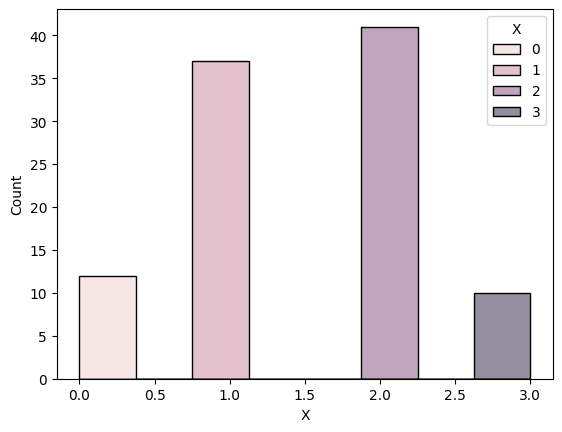

In [51]:

sns.histplot(df6, x="X", hue="X")



<AxesSubplot: xlabel='Y', ylabel='Count'>

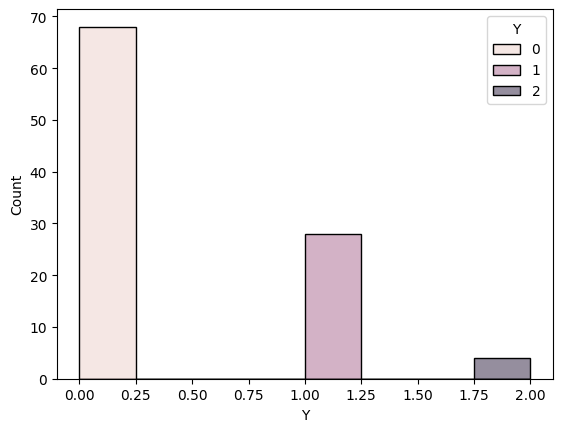

In [52]:
sns.histplot(df6, x="Y", hue="Y")

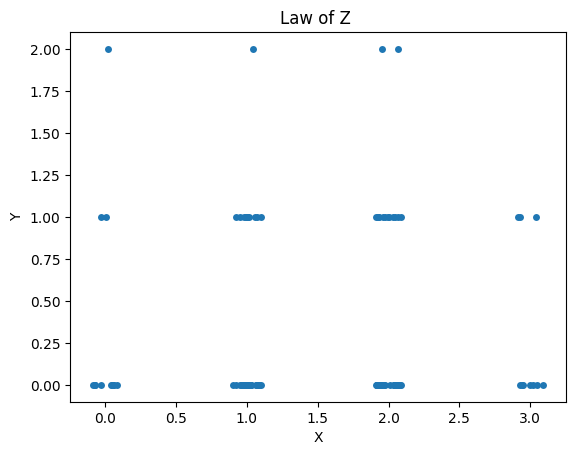

In [72]:
fig, ax = plt.subplots()
#sns.lineplot(arr, ax=ax)  # distplot is deprecate and replaced by histplot


g = sns.stripplot(data=df6,x="X", y="Y", jitter=True, native_scale=True, ax=ax)
#g.set(xlim=(0,4),ylim=(0,4))
plt.title("Law of Z ")
plt.show()
 # Mettre un scatter ploit avec un gitter

3)Compute the empirical average of the first n samples, as a function of the num-
ber of samples n and verify that it converges to the expected value, by plotting the
euclidean distance to the expected value as a function of n

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
[0.83333333 0.53547264 0.18595833 0.15139922 0.1306517  0.08376474
 0.05992271 0.02826665 0.03952546 0.04066594]


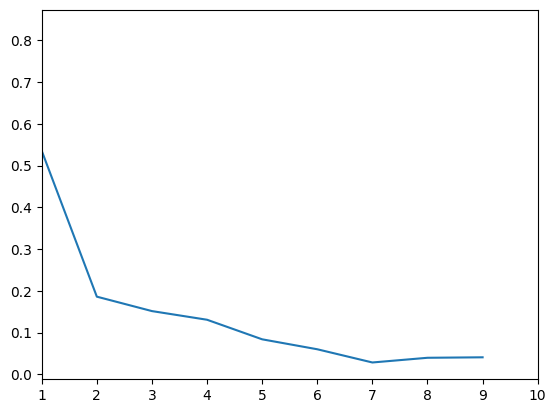

In [63]:

def convergence(n, ez):
    xEA = XSample[:n].sum() / n
    yEA = YSample[:n].sum() / n

    empirical_average = np.asarray((xEA, yEA))
    ez = np.asarray(ez)

    #Calculer la distance la moyenne empirique et l'expected value, verifier que ca converge vers 0.
    #print("Empirical Average = ", empirical_average)
    #print("Expected Value(Z) = ", ez)
    diff = np.linalg.norm(empirical_average - ez)
    #print("Ea - E(Z) = ", diff)
    return diff

indice = [i for i in range(1, 101, 10)]
print(indice)
arr = np.array([ convergence(i, ez) for i in range(1, 101, 10)])
print(arr)

fig, ax = plt.subplots()
sns.lineplot(arr, ax=ax)  # distplot is deprecate and replaced by histplot
ax.set_xlim(1,10)
plt.show()
#sns.lineplot(arr, ax=ax)
#Faire une courbe avec la convergence avec differentes valeur de n
 # Mettre un scatter ploit avec un gitter



Indeed the difference between the empirical average and the expected value converge to zero.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=78fee1a8-8fdd-4237-ba69-e565ec384717' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>